In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import model_fit
import ronchi_ruling as rr

# Spectral analysis of "R3L3" profile

## Load profile (unpack .nc array)

In [2]:
r3l3 = xr.open_dataset('data/R3L3.nc')

x, y, y_std = r3l3.x.values, r3l3.s.values, r3l3.ds.values

## Fit profile with spectral analysis, model Function (3, 3)

In [3]:
p0 = [np.mean(y), 50, 1, 1, 50, 1, 1, -10, 1, 1, -4, 1, 1, 5/3, 8*5/3] ## Initial guess

fit_result = model_fit.fit(rr.spectral_33, x, y, y_std, p0) ## Fit

## Print fitted parameters

In [4]:
model_fit.print_params(fit_result['pars'])

c = 85.4779+/-0.0034
a1 = -54.499+/-0.019
a2 = 4.549+/-0.017
a3 = 0.046+/-0.014
b1 = 33.409+/-0.024
b2 = -13.346+/-0.015
b3 = 0.569+/-0.014
au1 = 1.209+/-0.027
au2 = -0.556+/-0.014
au3 = -0.279+/-0.015
bu1 = -6.756+/-0.015
bu2 = 0.273+/-0.015
bu3 = -0.612+/-0.014
l1 = 1.6569760+/-0.0000028
lu = 13.3586+/-0.0017


## Plot the fit (upper panel) and standardized residuals (lower panel)

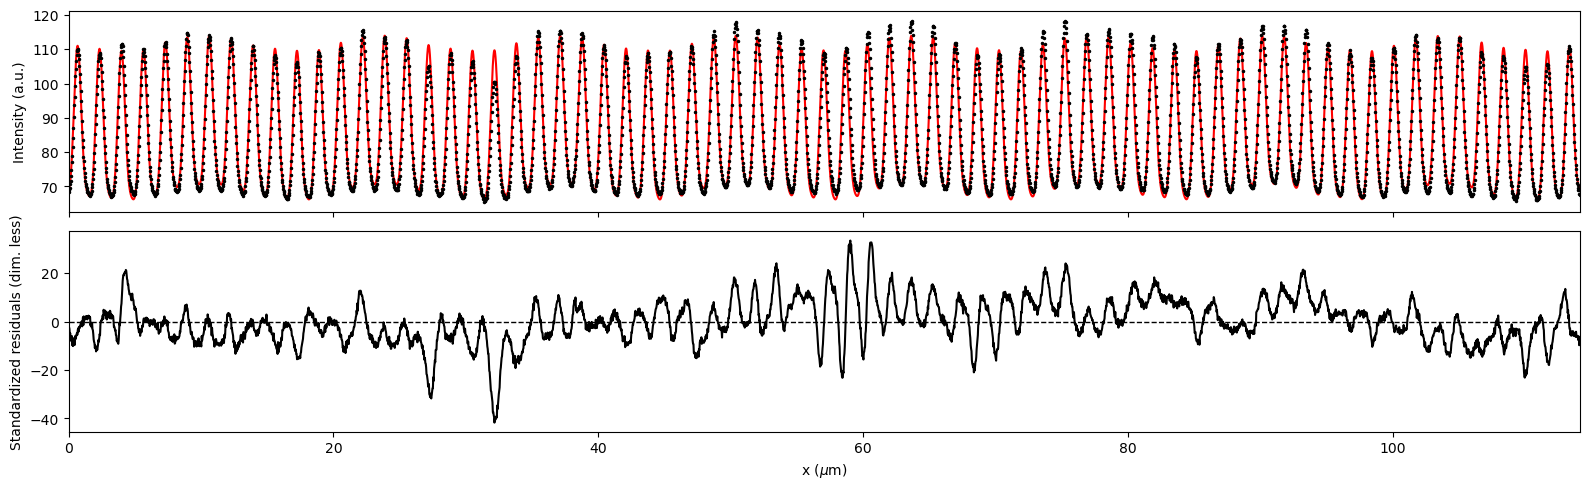

In [5]:
model_fit.plot_fit(fit_result, 
                   figsize=(16, 5), 
                   markersize=3, 
                   elinewidth=1,
                  ylabel='Intensity (a.u.)',
                  xlabel=r'x ($\mu$m)'
                  )

***

## Fit using bootstrap for parameter estimation

In [8]:
p0 = [np.mean(y), 50, 1, 1, 50, 1, 1, -10, 1, 1, -4, 1, 1, 5/3, 8*5/3] ## Initial guess

fit_result_bootstrap = model_fit.fit_with_bootstrap(rr.spectral_33, x, y, y_std, p0, n_trials=1000) ## Fit

## Plot fitted parameters

In [7]:
model_fit.print_params(fit_result_bootstrap['pars'])

c = 85.481+/-0.004
a1 = -54.496+/-0.014
a2 = 4.551+/-0.016
a3 = 0.040+/-0.015
b1 = 33.408+/-0.023
b2 = -13.347+/-0.009
b3 = 0.572+/-0.010
au1 = 1.206+/-0.028
au2 = -0.562+/-0.019
au3 = -0.282+/-0.018
bu1 = -6.759+/-0.014
bu2 = 0.279+/-0.019
bu3 = -0.618+/-0.012
l1 = 1.6569758+/-0.0000028
lu = 13.3590+/-0.0018


***